In [74]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/AAPL.csv


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [76]:
df = pd.read_csv("/kaggle/input/AAPL.csv")

In [77]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200
1,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400
2,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800
3,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500
4,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200
...,...,...,...,...,...,...,...
247,2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900
248,2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100
249,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000
250,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700


In [78]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2019-07-12,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200
2019-07-15,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400
2019-07-16,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800
2019-07-17,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500
2019-07-18,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200


In [79]:
df.shape

(252, 7)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-07-12 to 2020-07-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [81]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,271.614603,275.161230,268.842222,272.310079,271.120944,3.483519e+07
std,47.407232,48.030080,47.019259,47.710550,48.262329,1.707471e+07
min,195.410004,198.070007,192.580002,193.339996,191.059784,1.165440e+07
25%,227.704995,229.572495,225.789997,227.052498,225.227199,2.367062e+07
50%,268.104996,271.400009,265.410004,268.425003,267.455993,3.036590e+07
75%,312.262497,316.637497,309.742493,311.727501,311.175652,4.053645e+07
max,385.049988,385.269989,378.820007,383.679993,383.679993,1.067212e+08


In [82]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

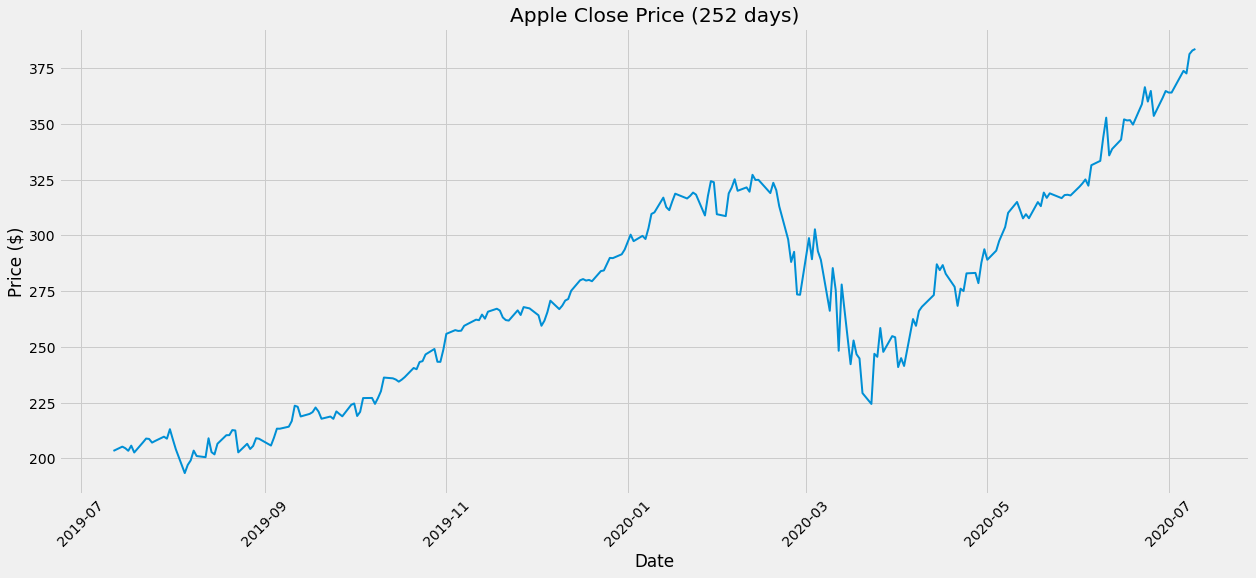

In [83]:
plt.figure(figsize=(19,8))
plt.plot(df['Close'],label='Close',linewidth=2)
plt.xticks(rotation=45)
plt.title('Apple Close Price (252 days)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [84]:
shortEMA=df.Close.ewm(span=12, adjust=False).mean()
longEMA=df.Close.ewm(span=26, adjust=False).mean()
MACD=shortEMA-longEMA
signal=MACD.ewm(span=9,adjust=False).mean()

In [85]:
shortEMA

2019-07-12    203.300003
2019-07-15    203.593850
2019-07-16    203.733257
2019-07-17    203.674296
2019-07-18    203.979789
                 ...    
2020-07-06    360.442556
2020-07-07    362.326778
2020-07-08    365.256504
2020-07-09    367.987813
2020-07-10    370.401994
Name: Close, Length: 252, dtype: float64

In [86]:
longEMA

2019-07-12    203.300003
2019-07-15    203.441485
2019-07-16    203.519893
2019-07-17    203.507309
2019-07-18    203.666768
                 ...    
2020-07-06    348.212489
2020-07-07    350.025639
2020-07-08    352.347443
2020-07-09    354.618744
2020-07-10    356.771429
Name: Close, Length: 252, dtype: float64

In [87]:
MACD

2019-07-12     0.000000
2019-07-15     0.152365
2019-07-16     0.213364
2019-07-17     0.166987
2019-07-18     0.313021
                ...    
2020-07-06    12.230067
2020-07-07    12.301140
2020-07-08    12.909061
2020-07-09    13.369069
2020-07-10    13.630565
Name: Close, Length: 252, dtype: float64

In [88]:
df.index

DatetimeIndex(['2019-07-12', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25',
               ...
               '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01',
               '2020-07-02', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10'],
              dtype='datetime64[ns]', length=252, freq=None)

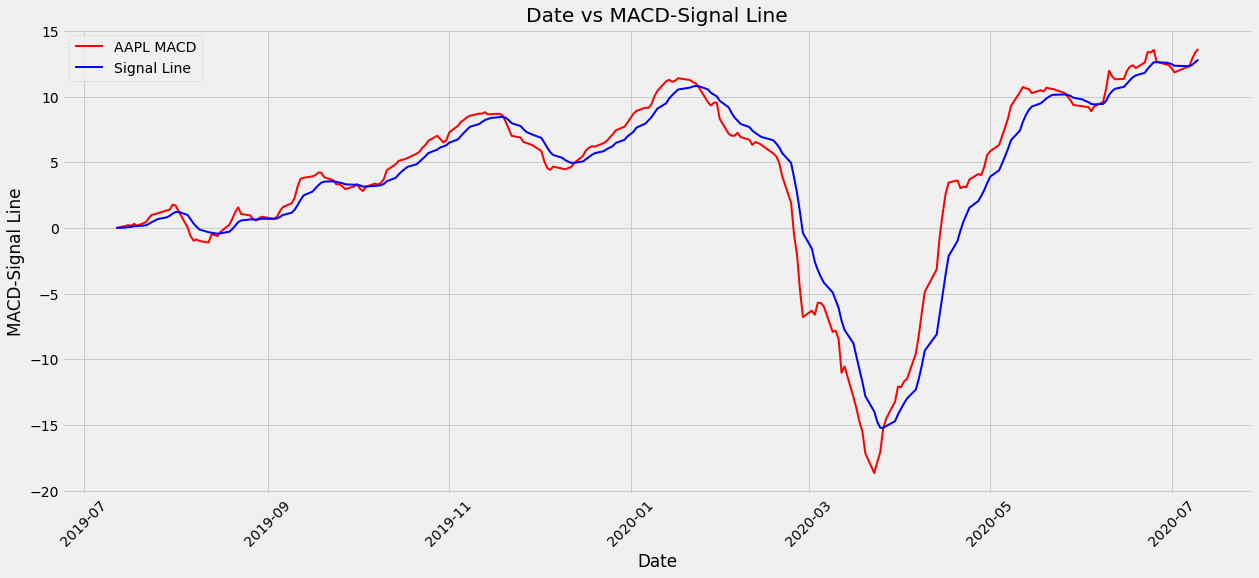

In [89]:
plt.figure(figsize=(19,8))
plt.plot(df.index, MACD, label='AAPL MACD',color='red',linewidth=2)
plt.plot(df.index, signal, label='Signal Line',color='blue',linewidth=2)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Date vs MACD-Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD-Signal Line')
plt.show()

In [90]:
df['MACD']=MACD
df['Signal']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
2019-07-12,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200,0.000000,0.000000
2019-07-15,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400,0.152365,0.030473
2019-07-16,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800,0.213364,0.067051
2019-07-17,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500,0.166987,0.087038
2019-07-18,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200,0.313021,0.132235
...,...,...,...,...,...,...,...,...,...
2020-07-06,2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900,12.230067,12.325482
2020-07-07,2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100,12.301140,12.320613
2020-07-08,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000,12.909061,12.438303
2020-07-09,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700,13.369069,12.624456


In [91]:
def buy_sell(signal):
  buy=[]
  sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i]>signal['Signal'][i]:
      sell.append(np.nan)
      if flag!=1:
        buy.append(signal['Close'][i])
        flag=1
      else:
        buy.append(np.nan)

    elif signal['MACD'][i]<signal['Signal'][i]:
      buy.append(np.nan)
      if flag!=0:
        sell.append(signal['Close'][i])
        flag=0
      else:
        sell.append(np.nan)

    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy, sell)

In [92]:
a=buy_sell(df)
df['Buy Signal Price']=a[0]
df['Sell Signal Price']=a[1]

In [93]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy Signal Price,Sell Signal Price
2019-07-12,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200,0.000000,0.000000,NaN,NaN
2019-07-15,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400,0.152365,0.030473,205.210007,NaN
2019-07-16,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800,0.213364,0.067051,NaN,NaN
2019-07-17,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500,0.166987,0.087038,NaN,NaN
2019-07-18,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200,0.313021,0.132235,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900,12.230067,12.325482,NaN,NaN
2020-07-07,2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100,12.301140,12.320613,NaN,NaN
2020-07-08,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000,12.909061,12.438303,381.369995,NaN
2020-07-09,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700,13.369069,12.624456,NaN,NaN


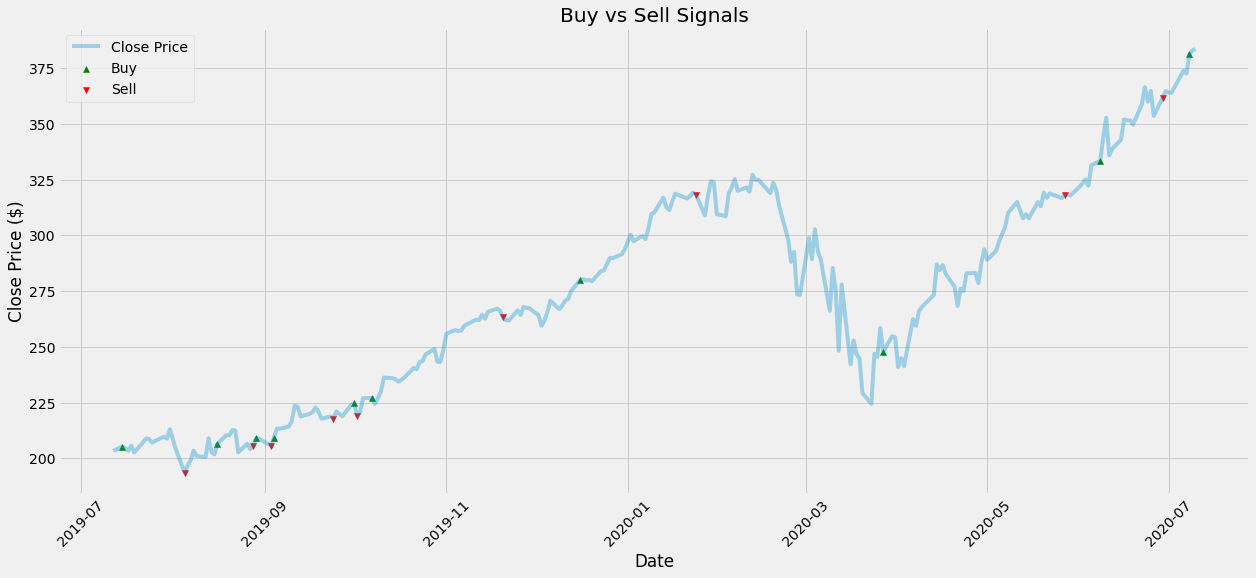

In [94]:
plt.figure(figsize=(19,8))
plt.scatter(df.index,df['Buy Signal Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index,df['Sell Signal Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df.Close, label='Close Price', alpha=0.35)
plt.title('Buy vs Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

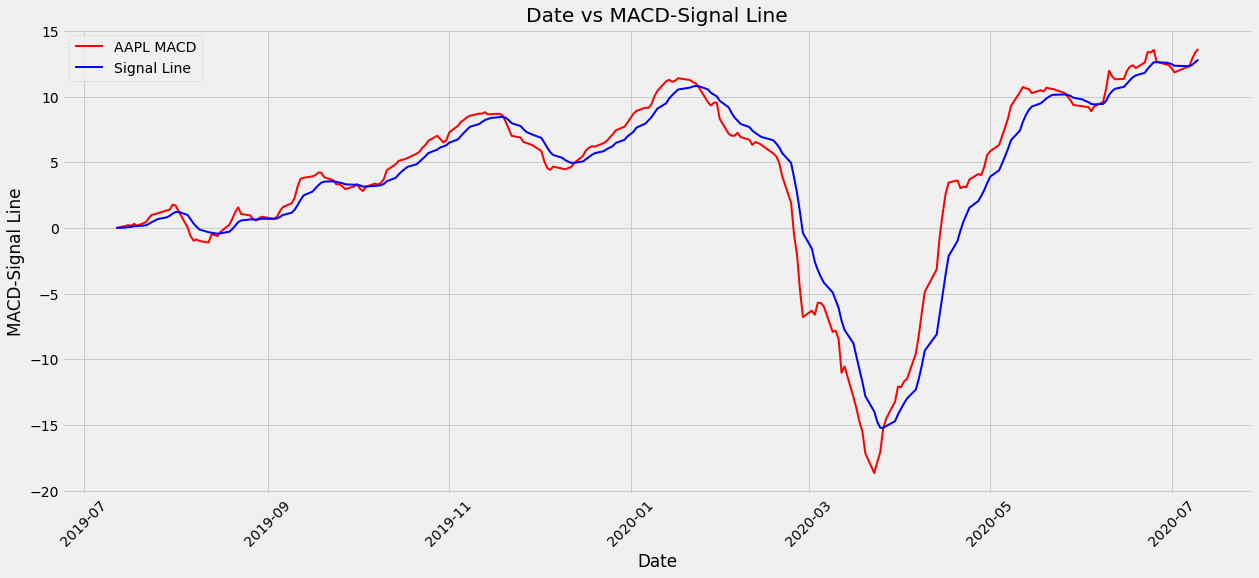

In [95]:
plt.figure(figsize=(19,8))
plt.plot(df.index, MACD, label='AAPL MACD',color='red',linewidth=2)
plt.plot(df.index, signal, label='Signal Line',color='blue',linewidth=2)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Date vs MACD-Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD-Signal Line')
plt.show()